# heart_disease tvae stacking

Training on heart_disease dataset using tvae model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "tvae"
target = "target"

In [33]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [3]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-08T11:46:55.667834+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 40%|████      | 400/1000 [02:34<03:51,  2.59it/s]


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      60    1                4           120          246   
1      41    1                4           109          194   
2      63    0                3           130          224   
3      46    1                2           107          186   
4      60    1                4           153          245   
...   ...  ...              ...           ...          ...   
1185   58    1                4           152          221   
1186   61    1                3           137          294   
1187   64    1                4           115            0   
1188   44    1                2           121          238   
1189   45    0                4           139          232   

 

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-08T11:49:33.457646+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▌      | 350/1000 [04:43<08:46,  1.23it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   55    1                3           130          231   
457    61    1                3           120            0   
1738   43    1                2           110          232   
883    44    1                2           120          263   
2279   42    1                3           130          241   
...   ...  ...              ...           ...          ...   
1638   59    1                4           130          255   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   46    1                4           156          248   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            2             126                0   
457                     0            0              80                1   
1738               

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-08T11:54:18.418615+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 65%|██████▌   | 650/1000 [18:22<09:53,  1.70s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   55    1                4           150          252   
4227   44    1                4           151          255   
3135   42    1                4           111          236   
1554   55    1                4           138            0   
...   ...  ...              ...           ...          ...   
4426   58    1                4           139          224   
466    42    1                3           134          240   
3092   58    1                3           129          243   
3772   41    1                2           129          232   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    0            2             122                1   
4227               

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-08T12:12:42.772199+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [3:03:41<3:03:41, 22.04s/it]    


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   60    1                4           153          236   
3016   58    1                2           130            2   
5292   57    1                4           138          185   
7932   55    1                4           138           15   
4734   42    1                2           137          232   
...   ...  ...              ...           ...          ...   
5734   43    1                4           138          231   
5191   61    0                3           151          248   
5390   53    1                4           139          237   
860    62    0                4           140          268   
7270   40    1                3           140          196   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            0             116                1   
3016                    0            0             123                0   
5292               

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-08T15:16:27.254811+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 55%|█████▌    | 550/1000 [1:08:59<56:26,  7.53s/it]  


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    42    1                4           121          260   
1288    45    1                2           105          245   
18494   52    1                4           119          233   
15527   42    1                4           128          232   
12341   43    1                4           138          275   
...    ...  ...              ...           ...          ...   
11284   43    1                4           119          247   
11964   42    1                4           118            0   
5390    53    1                4           139          237   
860     62    0                4           140          268   
15795   43    1                2           119          239   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            0             160                1   
1288                     0            0             121                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-08T16:25:35.533317+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 95%|█████████▌| 950/1000 [4:01:47<12:43, 15.27s/it]  


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-08T20:27:36.635524+0200][6244][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 1000/1000 [3:36:40<00:00, 13.00s/it] 


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   53    1                1           151          226   
1510    44    0                2           119          248   
26995   67    1                4           149          236   
14320   58    1                4           138            0   
34943   58    1                4           110          244   
...    ...  ...              ...           ...          ...   
16850   41    1                2           109          228   
6265    60    1                4           138            7   
11284   43    1                4           119          247   
860     62    0                4           140          268   
15795   43    1                2           119          239   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             108                0   
1510                     0            1             107                0   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   40    1                2           107          232   
6191    61    0                3           129          227   
3687    59    1                4           138          241   
1440    54    1                4           129            0   
28826   59    1                3           137          239   
...    ...  ...              ...           ...          ...   
18040   42    1                4           110          234   
7455    54    1                4           120          252   
12474   43    1                3           129          244   
2050    43    0                3           129          246   
16985   43    1                2           129          239   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            0             157                0   
6191                     0            0             159                0   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [21]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.011048,0.002776,0.988952,0.002776
1,pca_eigval_diff,u,0.072728,NaN,0.927272,NaN
2,pca_eigvec_ang,u,0.176735,NaN,0.943744,NaN
3,avg_cio,u,0.195522,0.117690,0.195522,0.117690
4,corr_mat_diff,u,0.831667,NaN,0.987399,NaN
5,mutual_inf_diff,u,0.981738,NaN,0.985125,NaN
6,ks_tvd_stat,u,0.092144,0.017266,0.907856,0.017266
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.024876,0.007483,0.975124,0.007483
9,avg_pMSE,u,0.008262,0.000384,0.966953,0.001535


# Eval on syn_2

In [22]:
# Read train and test data from stack_v1
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v1_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v1_test.csv")

# Read syn_v2 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.007854,0.001958,0.992146,0.001958
1,pca_eigval_diff,u,0.046085,NaN,0.953915,NaN
2,pca_eigvec_ang,u,0.147757,NaN,0.952968,NaN
3,avg_cio,u,0.310326,0.190494,0.310326,0.190494
4,corr_mat_diff,u,0.413954,NaN,0.993728,NaN
5,mutual_inf_diff,u,0.632587,NaN,0.990415,NaN
6,ks_tvd_stat,u,0.073045,0.013500,0.926955,0.013500
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.072587,0.052606,0.927413,0.052606
9,avg_pMSE,u,0.005668,0.000215,0.977327,0.000861


# Eval on syn_3

In [23]:
# Read train and test data from stack_v2
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v2_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v2_test.csv")

# Read syn_v3 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.004660,0.001260,0.995340,0.001260
1,pca_eigval_diff,u,0.054557,NaN,0.945443,NaN
2,pca_eigvec_ang,u,0.191497,NaN,0.939045,NaN
3,avg_cio,u,0.255154,0.159689,0.255154,0.159689
4,corr_mat_diff,u,0.413446,NaN,0.993736,NaN
5,mutual_inf_diff,u,0.397164,NaN,0.993982,NaN
6,ks_tvd_stat,u,0.054524,0.008366,0.945476,0.008366
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.072304,0.054461,0.927696,0.054461
9,avg_pMSE,u,0.004571,0.000094,0.981714,0.000377


# Eval on syn_4

In [24]:
# Read train and test data from stack_v3
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v3_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v3_test.csv")

# Read syn_v4 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.005064,0.000876,0.994936,0.000876
1,pca_eigval_diff,u,0.018969,NaN,0.981031,NaN
2,pca_eigvec_ang,u,0.065186,NaN,0.979251,NaN
3,avg_cio,u,0.255600,0.143499,0.255600,0.143499
4,corr_mat_diff,u,0.170874,NaN,0.997411,NaN
5,mutual_inf_diff,u,0.221197,NaN,0.996649,NaN
6,ks_tvd_stat,u,0.052639,0.011145,0.947361,0.011145
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.068665,0.055754,0.931335,0.055754
9,avg_pMSE,u,0.002406,0.000087,0.990377,0.000349


# Eval on syn_5

In [25]:
# Read train and test data from stack_v4
data_train = pd.read_csv(f"{gen_method}\hearts_stack_v4_train.csv")
data_test = pd.read_csv(f"{gen_method}\hearts_stack_v4_test.csv")

# Read syn_v5 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.009809,0.000654,0.990191,0.000654
1,pca_eigval_diff,u,0.019968,NaN,0.980032,NaN
2,pca_eigvec_ang,u,0.139513,NaN,0.955592,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.153397,NaN,0.997676,NaN
5,mutual_inf_diff,u,0.145502,NaN,0.997795,NaN
6,ks_tvd_stat,u,0.035536,0.009550,0.964464,0.009550
7,frac_ks_sigs,u,0.916667,NaN,0.083333,NaN
8,avg_h_dist,u,0.062063,0.056685,0.937937,0.056685
9,avg_pMSE,u,0.002209,0.000086,0.991165,0.000344


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [26]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_v5_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.017196,0.002766,0.982804,0.002766
1,pca_eigval_diff,u,0.143379,NaN,0.856621,NaN
2,pca_eigvec_ang,u,0.420458,NaN,0.866164,NaN
3,avg_cio,u,0.187664,0.128950,0.187664,0.128950
4,corr_mat_diff,u,1.233695,NaN,0.981308,NaN
5,mutual_inf_diff,u,1.263012,NaN,0.980863,NaN
6,ks_tvd_stat,u,0.130316,0.021943,0.869684,0.021943
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.093743,0.053713,0.906257,0.053713
9,avg_pMSE,u,0.023097,0.001133,0.907611,0.004531


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [27]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only_on_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.019009,0.002775,0.980991,0.002775
1,pca_eigval_diff,u,0.140016,NaN,0.859984,NaN
2,pca_eigvec_ang,u,0.477349,NaN,0.848055,NaN
3,avg_cio,u,0.426240,0.185712,0.426240,0.185712
4,corr_mat_diff,u,1.214266,NaN,0.981602,NaN
5,mutual_inf_diff,u,1.258703,NaN,0.980929,NaN
6,ks_tvd_stat,u,0.144571,0.020732,0.855429,0.020732
7,frac_ks_sigs,u,0.916667,NaN,0.083333,NaN
8,avg_h_dist,u,0.101185,0.053642,0.898815,0.053642
9,avg_pMSE,u,0.032022,0.000841,0.871911,0.003363


# Multiple plots for evaluation comparisons

# Evaluating synth stacks over time

In [28]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [29]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.023109,0.448109,0.000000
res_stack_v1,0.093487,0.470973,0.000000
res_stack_v2,0.029149,0.452031,0.000525
res_stack_v3,0.011686,0.432694,0.001707
res_stack_v4,0.027836,0.463384,0.000591


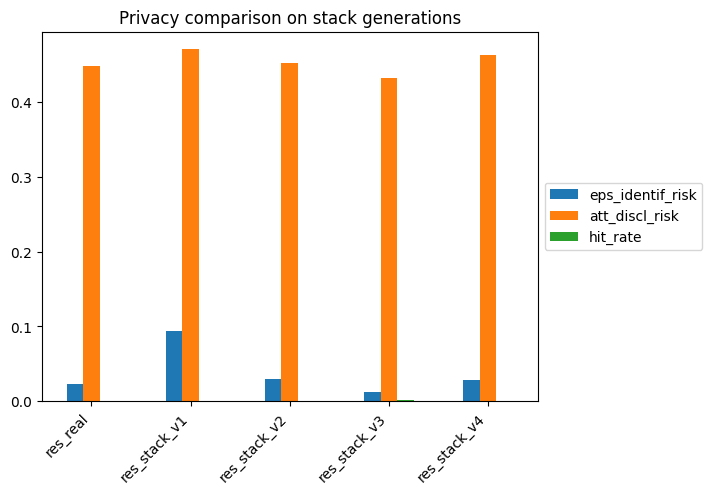

In [30]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [31]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.011048,0.072728,0.176735
res_stack_v1,0.007854,0.046085,0.147757
res_stack_v2,0.004660,0.054557,0.191497
res_stack_v3,0.005064,0.018969,0.065186
res_stack_v4,0.009809,0.019968,0.139513


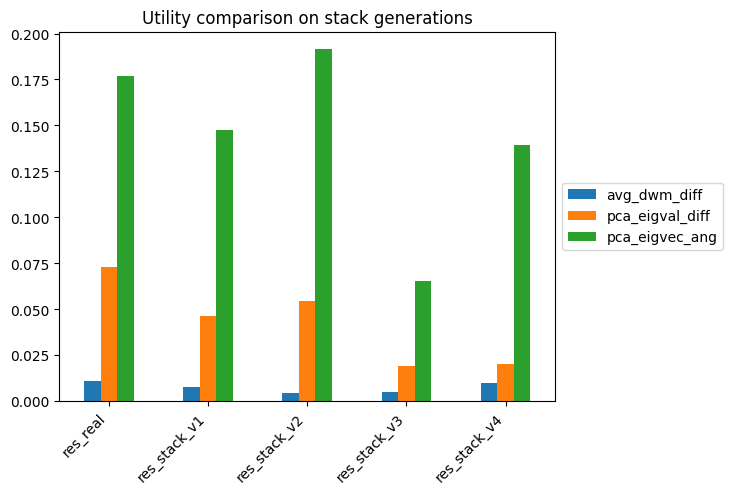

In [32]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [33]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.831667,0.981738
res_stack_v1,0.413954,0.632587
res_stack_v2,0.413446,0.397164
res_stack_v3,0.170874,0.221197
res_stack_v4,0.153397,0.145502


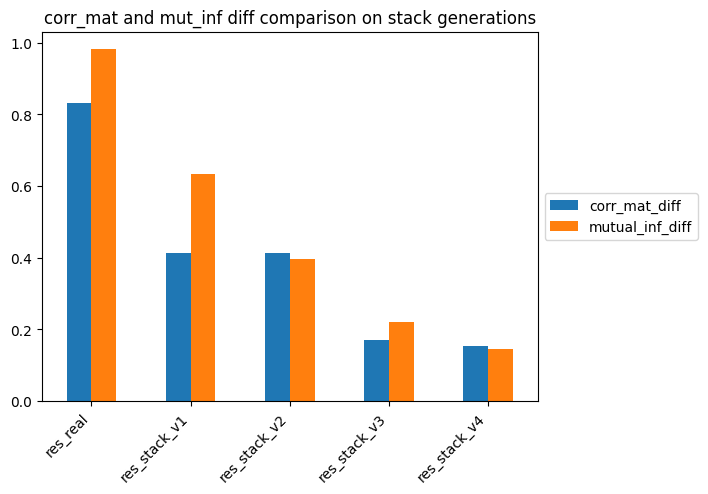

In [34]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [35]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.011048,0.072728,0.176735,0.195522,0.831667,0.981738,0.092144,0.833333,0.024876,0.008262,...,0.001236,0.923214,-0.137010,0.099580,0.070378,0.003435,0.000000,0.023109,0.112605,0.448109
res_stack_v1,0.007854,0.046085,0.147757,0.310326,0.413954,0.632587,0.073045,0.833333,0.072587,0.005668,...,0.010708,0.851418,-0.008491,0.040983,0.018908,0.007765,0.000000,0.093487,0.810924,0.470973
res_stack_v2,0.004660,0.054557,0.191497,0.255154,0.413446,0.397164,0.054524,1.000000,0.072304,0.004571,...,0.009459,0.921507,-0.110425,0.046745,0.013393,0.009068,0.000525,0.029149,0.173529,0.452031
res_stack_v3,0.005064,0.018969,0.065186,0.255600,0.170874,0.221197,0.052639,1.000000,0.068665,0.002406,...,0.008799,0.958259,-0.071888,0.049008,0.023241,0.002214,0.001707,0.011686,0.167857,0.432694
res_stack_v4,0.009809,0.019968,0.139513,0.000000,0.153397,0.145502,0.035536,0.916667,0.062063,0.002209,...,-0.001326,0.954642,-0.004121,0.022009,0.014903,0.001221,0.000591,0.027836,0.790126,0.463384


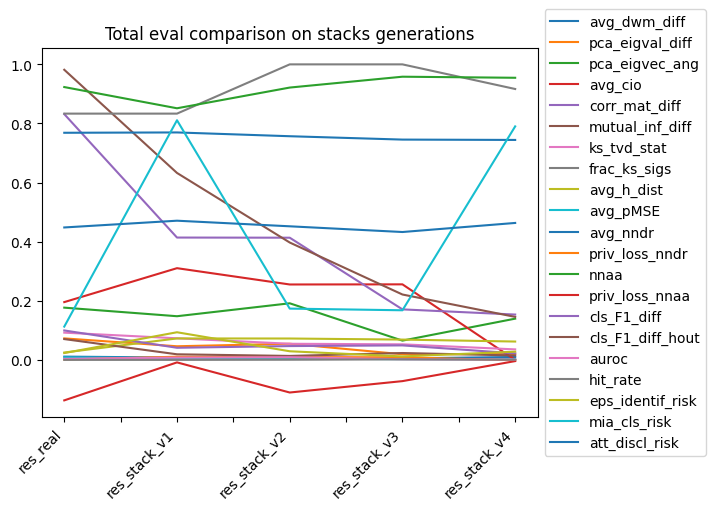

In [36]:
total_eval.plot.line()
plt.title("Total eval comparison on stacks generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [37]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.782000,0.880800
1,res_stack_v1,0.805199,0.794394
2,res_stack_v2,0.784777,0.872654
3,res_stack_v3,0.788659,0.881349
4,res_stack_v4,0.778958,0.807103


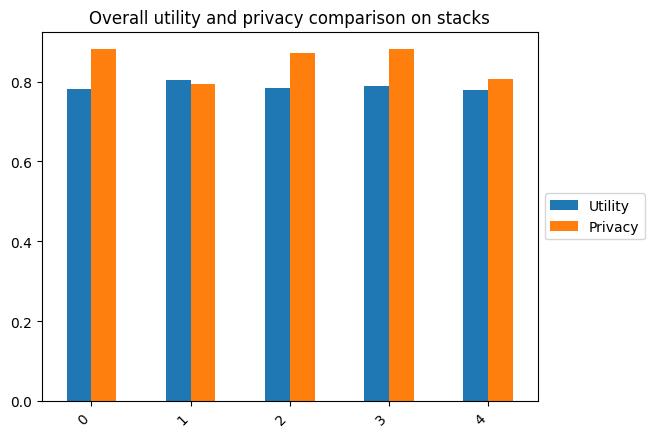

In [38]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [39]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [40]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.023109,0.448109,0.0
res_stack_v5_on_real,0.021008,0.436625,0.0
res_stack_synth_only_on_real,0.031513,0.456232,0.0


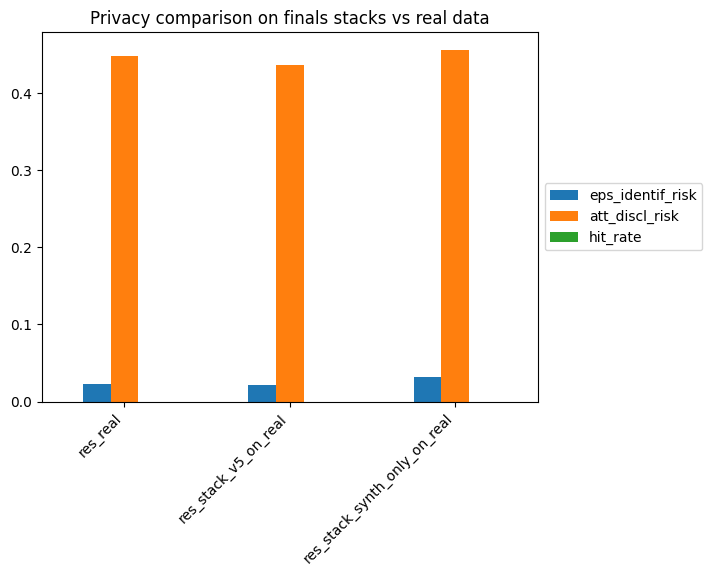

In [41]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [42]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.011048,0.072728,0.176735
res_stack_v5_on_real,0.017196,0.143379,0.420458
res_stack_synth_only_on_real,0.019009,0.140016,0.477349


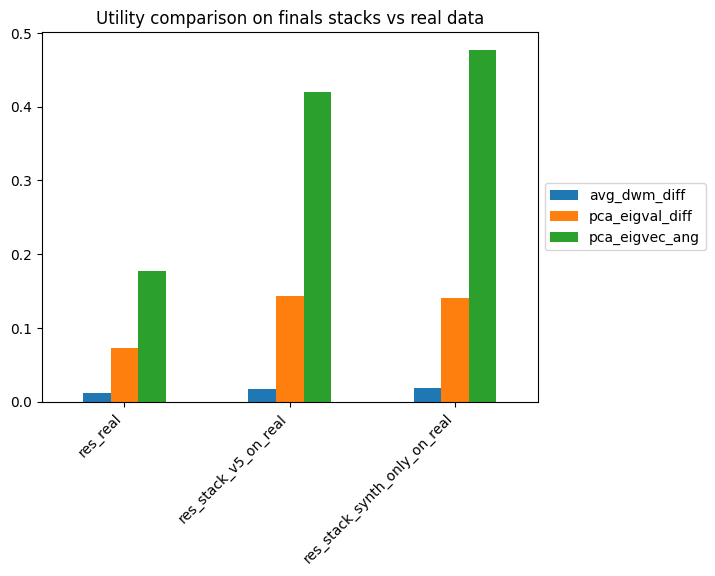

In [43]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [44]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.831667,0.981738
res_stack_v5_on_real,1.233695,1.263012
res_stack_synth_only_on_real,1.214266,1.258703


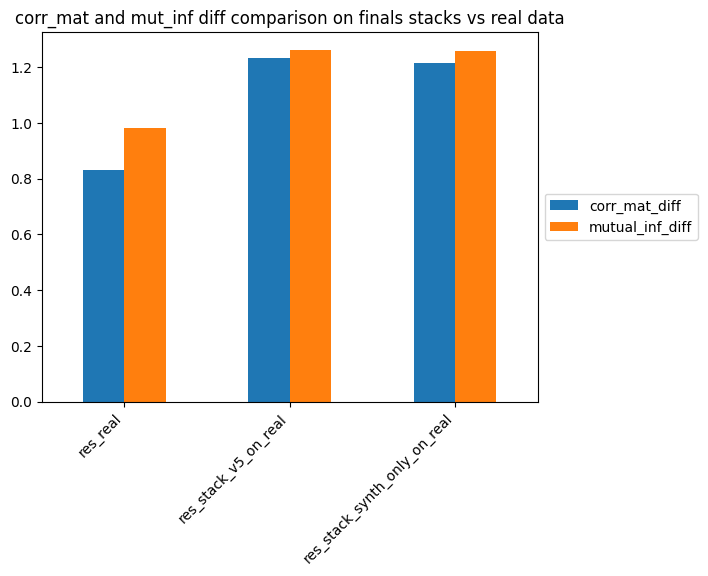

In [45]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.011048,0.072728,0.176735,0.195522,0.831667,0.981738,0.092144,0.833333,0.024876,0.008262,...,0.001236,0.923214,-0.137010,0.099580,0.070378,0.003435,0.0,0.023109,0.112605,0.448109
res_stack_v5_on_real,0.017196,0.143379,0.420458,0.187664,1.233695,1.263012,0.130316,0.833333,0.093743,0.023097,...,-0.004322,0.936029,-0.094923,0.165216,0.101891,0.000872,0.0,0.021008,0.102521,0.436625
res_stack_synth_only_on_real,0.019009,0.140016,0.477349,0.426240,1.214266,1.258703,0.144571,0.916667,0.101185,0.032022,...,0.001105,0.922479,-0.090966,0.113683,0.069328,0.046456,0.0,0.031513,0.092437,0.456232


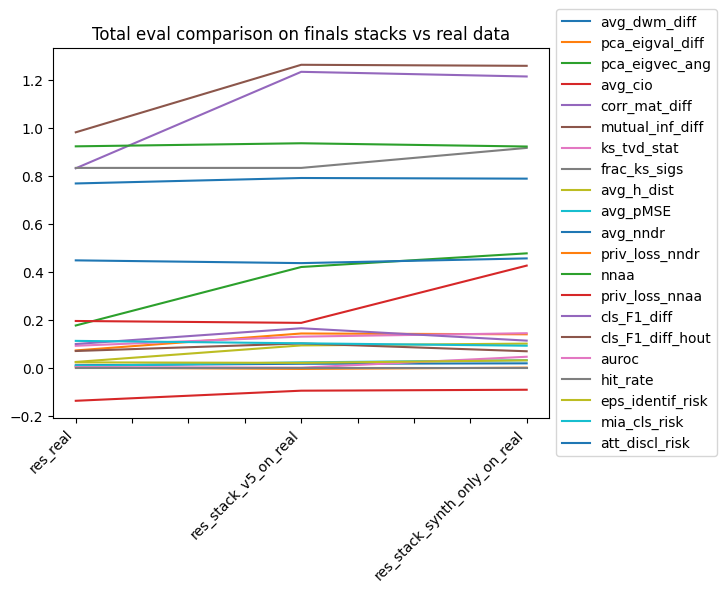

In [47]:
total_eval.plot.line()
plt.title("Total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [48]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.782000,0.880800
1,res_stack_v5_on_real,0.750117,0.891481
2,res_stack_synth_only_on_real,0.759667,0.889528


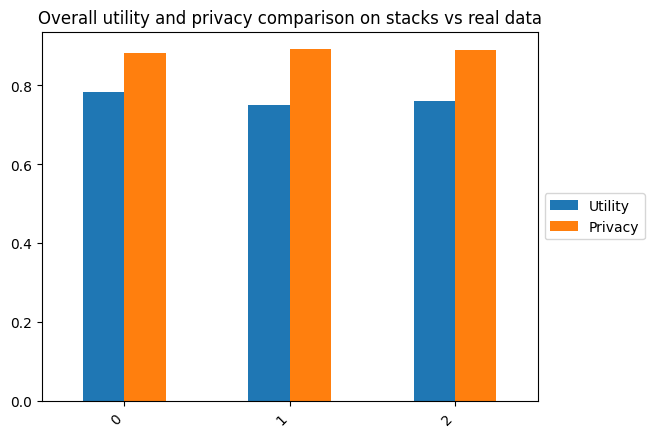

In [49]:
overall_res.plot.bar()
plt.title("Overall utility and privacy comparison on stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()